In [2]:
import pandas as pd
import numpy as np

df = pd.read_json('../../data/dataset-2.json').replace(np.nan, 0)
df.head()

,contestId,index,name,rating,timeLimit,memoryLimit,statement,tags.hashing,tags.string suffix structures,tags.strings,...,tags.probabilities,tags.meet-in-the-middle,tags.interactive,tags.2-sat,tags.chinese remainder theorem,tags.graph matchings,tags.fft,tags.*special,tags.schedules,tags.expression parsing
0,2010,C2,Message Transmission Error (hard version),1700.0,2,256,This is a more difficult version of the proble...,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,C1,Message Transmission Error (easy version),1400.0,2,256,This is a simplified version of the problem. I...,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,B,Three Brothers,800.0,1,256,Three brothers agreed to meet. Let's number th...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,A,Alternating Sum of Numbers,800.0,2,256,You are given a sequence of integers. Output t...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009,G3,Yunli's Subarray Queries (extreme version),2700.0,3,512,This is the extreme version of the problem. In...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import re

def clean_text(text):
    # replace all the special characters with space
    text=text.replace('+',' plus ')
    text=text.replace('-',' minus ')
    text=text.replace('*',' times ')
    text=text.replace('^',' power ')
    text=text.replace('/',' divide ')
    text=text.replace('<',' le ')
    text=text.replace('>',' ge ')
    text=text.replace('≤',' leq ')
    text=text.replace('<=',' leq ')
    text=text.replace('≥',' geq ')
    text=text.replace('>=',' geq ')
    text=text.replace('=',' equal ')
    text=text.replace('#',' numerical ')
    
    text = re.sub(r'[_\'\"]', '', text)

    text = re.sub(r'\W', ' ', text)
    return text

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

wordbag = set()
statements = df['statement'].apply(str.lower).apply(clean_text)

stop_words = set(stopwords.words('english'))

tokens = [[word for word in word_tokenize(st) if word not in stop_words] for st in statements]

for st_tok in tokens:
    wordbag.update(set(st_tok))
len(wordbag)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\enriq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


26047

Max length: 871


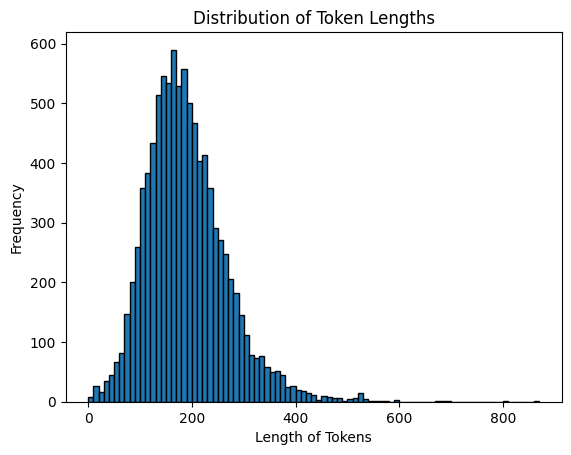

In [5]:
import matplotlib.pyplot as plt

# Calculate the lengths of each element in the tokens list
lengths = [len(token) for token in tokens]

# Create bins for the lengths, grouped by intervals of 10
bins = range(0, max(lengths), 10)
print(f'Max length: {max(lengths)}')
# Plot the histogram
plt.hist(lengths, bins=bins, edgecolor='black')
plt.xlabel('Length of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.show()

In [6]:
from gensim.models import Word2Vec

embedding_size = 128
cbow_model = Word2Vec(sentences=tokens, vector_size=embedding_size, window=5, sg=0)
cbow_model.save(f'../models/cbow_{embedding_size}.model')
sg_model = Word2Vec(sentences=tokens, vector_size=embedding_size, window=5, sg=1)
sg_model.save(f'../models/sg_{embedding_size}.model')

In [9]:
cbow_model.wv.most_similar('1000000007')

[('modulo', 0.8498135209083557),
 ('dividing', 0.7722854614257812),
 ('998244353', 0.7670384049415588),
 ('1000000009', 0.7562291026115417),
 ('1073741824', 0.7487946152687073),
 ('residue', 0.7362995743751526),
 ('998', 0.7299115061759949),
 ('244', 0.7085145711898804),
 ('congruent', 0.6978811025619507),
 ('remainder', 0.6885865330696106)]